## Linear Regression


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf     

%matplotlib inline

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

#### Data Load



In [18]:
advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
advertising.head()    # advertising.tail() 

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##### Exploratory Analysis


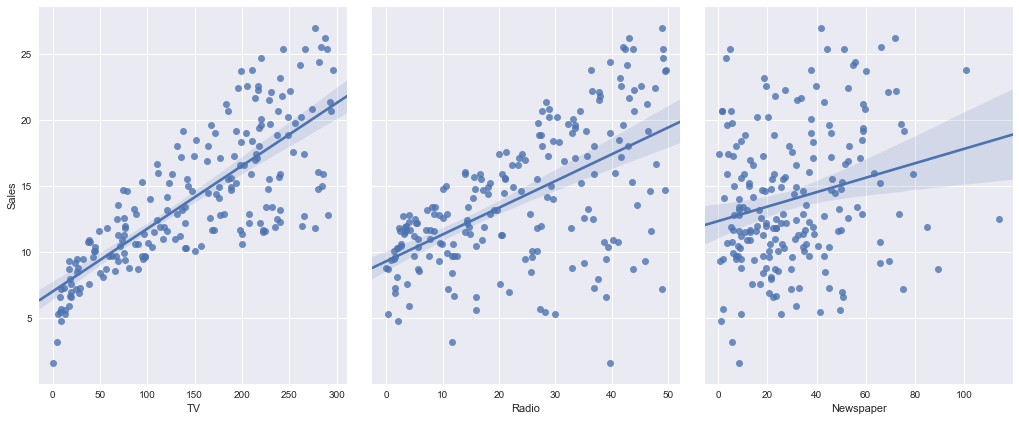

In [19]:
# Show only the relationship between 'Sales' and features as scatterplot,
# Show the regression line and 95% confidence band as in ggplot of 'R' ('kind =' reg ').
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=0.8, kind='reg') 

#### 3.1 Simple Linear Regression : 


$Y = \beta_0 + \beta_1X$

- $Y$ : response/output/target 
- $X$ : feature/input/predictor
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $X$

If you use * sales * for Response (Y) and * TV * for one feature (X)

$sales = \beta_0 + \beta_1TV$

- $ \ beta_0 $ and $ \ beta_1 $ are called ** model coefficients (or weight) **
- ** Learning of simple linear regression **: The data of $ \ beta_0 $ and $ \ beta_1 $ that make up the line format that best fits the relationship between ** sales ** and ** TV ** (minimizing RSS) Learn to estimate

#### Estimating the Coefficients of Linear Model 
*** Using Statsmodels *** to estimate the coefficient of the linear regression model for ** advertising ** data   

#### Using Statsmodels  - Linear Model


In [20]:
lm = smf.ols(formula='Sales ~ TV', data=advertising)   
lm_learned = lm.fit()
lm_learned.params 

Intercept    7.032594
TV           0.047537
dtype: float64

In [21]:
lm = smf.ols(formula='Sales ~ TV', data=advertising).fit()   
print ("Coeffients:\n%s \n\np-values:\n%s , \n\nr-squared: %s " % (lm.params, lm.pvalues, lm.rsquared))

Coeffients:
Intercept    7.032594
TV           0.047537
dtype: float64 

p-values:
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64 , 

r-squared: 0.61187505085 


#### The next two cells are another example of visualizing the relationship between response and feature

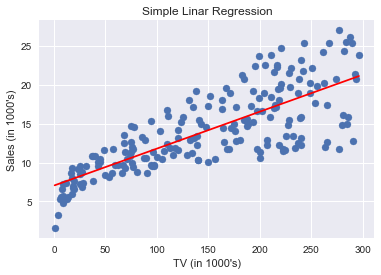

In [22]:
plt.scatter(advertising.TV, advertising.Sales)
plt.xlabel("TV (in 1000's)")
plt.ylabel("Sales (in 1000's)")

X = pd.DataFrame({'TV':[advertising.TV.min(), advertising.TV.max()]})
Y_pred = lm.predict(X)
plt.plot(X, Y_pred, c='red')
plt.title("Simple Linar Regression")

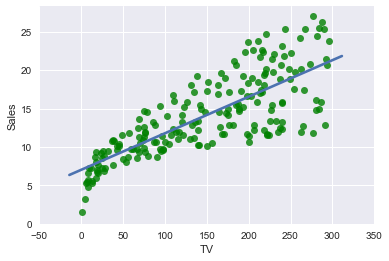

In [23]:
# seaborn 
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'g'})
plt.xlim(-50,350)
plt.ylim(ymin=0);

In [24]:
lm.summary()     # Overall model summary. Similar to the summary () function in R

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           1.47e-42
Time:                        09:58:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### Use learned models: Predictions and related issues
    The model lm created above was created using only the TV variables of the advertisement as a feature.
    The above R-squared value of 0.612, or Residual, was calculated by using the training set
    The goal of the predictive analysis is not to create a model that shows good performance for the training set, but to create a model that will show good performance for the out-of-sample data that will be first seen (future) Out-of-sample performance model)
    Future data does not exist now, and can you guess how the current model will work in the future? -> Model evaluation
    Prediction: When you give a new predictor value (TV) using the created model (lm), what is the 'Sales' prediction?
    For example, when TV = 100,

In [26]:
x_new = pd.DataFrame({'TV': [100]})   
# x_new.info()
x_new.head()

,TV
0,100


### 4. Prediction: Use the 'predict' method as shown below.
The input of predict () must have features that were used for training in the form of an array, such as a DataFrame.

In [27]:
lm.predict(x_new)    # Returns the result, the ndarray of numpy

0    11.786258
dtype: float64

### Calculate by hand
$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times x$$

In [28]:
sales_manual = lm.params.Intercept + lm.params.TV * 100
print("Manual Calculation : %6f" % sales_manual)

Manual Calculation : 11.786258


In [29]:
X_new = pd.DataFrame({'TV': [100, 422, 74]})   
lm.predict(X_new)

0    11.786258
1    27.093056
2    10.550305
dtype: float64

## Multiple Linear Regression

**multiple linear regression**: 

$Y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

*** Multiple linear regression*** with features of TV, Radio and Newspapers of Advertising and sales as response:

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [30]:
lm_mul = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           1.58e-96
Time:                        09:58:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpret the results
Since the p-value of the F statistic is very small (1.58e-96), the model is valid (at least one variable associated with the response)
- The p-values of TV and Radio are meaningful. However, since the p-value of the Newspaper is 0.86, it can not reject the null hypothesis that "Newspaper is not related to response". Therefore, it is not appropriate to include the Newspaper variable in the model.
- ** R-squared ** was 0.89, which is higher than simple linear regression (0.612). This model can be thought of as a better explanation (prediction) of the response of the traning set than at least a simple linear regression.
- Note: Since this R-squared is obtained for the data (ie training set) when making the model, we can not be sure that it shows better characteristics in out-of-sample
- ** Cross-validation **, you can guess whether your model will ** generalize ** well for ** out-of-sample ** -> later

In [31]:
lm_mul.summary().tables[1]               # Table 3.4 of ISLR 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [32]:
advertising.corr()     # Table 3.5 of ISLR : correlation matrix 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## 3.3   Other Considerations in the Regression Model

### Qualitative Predictors

In [33]:
credit = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', usecols=list(range(1,12)))
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


- Most of the data types (dtypes) of the above features, such as float64 and int64, are non-numeric 'object', mostly string types or other class types. These are likely category type variables.
- Gender, Student, Married, and Ethnicity in Feature are qualitative (categorical) variables
- There are 400 rows / observations, all features have 400 non-null values. That is, missing value is missing

In [34]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [35]:
credit.isnull().sum()           #  missing value

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

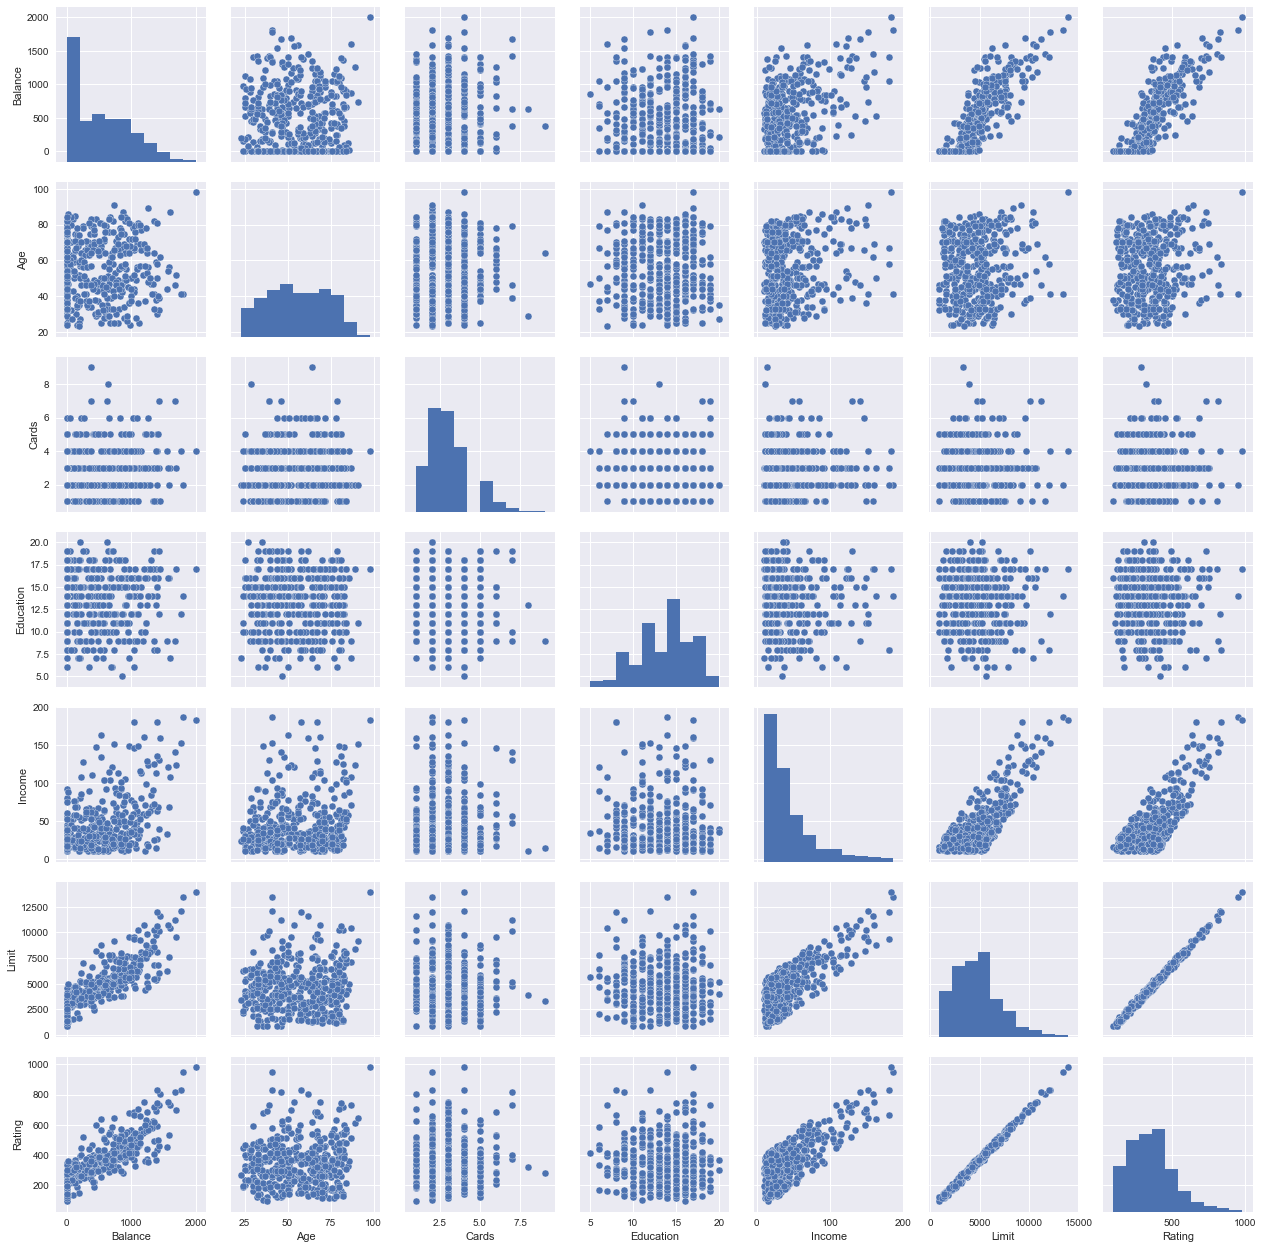

In [36]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

In [37]:
credit.Gender.unique()               # Gender

array([' Male', 'Female'], dtype=object)

## Utilizing the category type variable 'Gender' as a feature

In [38]:
lm_cat = smf.ols(formula='Balance ~ Gender', data=credit).fit()   # Gender has 2 levels -> 1 dummy variable
lm_cat.summary().tables[1]          # ISLR - Table 3.7  

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [39]:
# Regression of Balance onto Ethnicity
lm_cat_Eth = smf.ols('Balance ~ Ethnicity', credit).fit()
lm_cat_Eth.summary().tables[1]             # Table 3.8 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


- Since the F-statistic p-value is 0.957 and there is no relation between 'Balance and Ethnicity' null hypothesis can not be rejected, according to this data it is better to follow the null hypothesis. In other words, this model is ** BAM! **

** To exclude only 'Ethnicity' among the variables - it is annoying to list the features in the formula. behind... **

In [40]:
lm_all = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married', credit).fit()
lm_all.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-468.4037,34.355,-13.634,0.000,-535.948,-400.859
Gender[T.Female],-10.4067,9.904,-1.051,0.294,-29.879,9.065
Student[T.Yes],426.4692,16.678,25.571,0.000,393.680,459.259
Married[T.Yes],-7.0191,10.278,-0.683,0.495,-27.226,13.188
Income,-7.8020,0.234,-33.349,0.000,-8.262,-7.342
Limit,0.1931,0.033,5.909,0.000,0.129,0.257
Rating,1.1023,0.489,2.253,0.025,0.140,2.064
Cards,17.9233,4.332,4.137,0.000,9.406,26.441
Age,-0.6347,0.293,-2.164,0.031,-1.211,-0.058
Education,-1.1150,1.596,-0.699,0.485,-4.253,2.023



## Removing the Additive Assumptions :  Interaction 

In [41]:
lm_interact = smf.ols('Sales ~ TV + Radio + TV:Radio', advertising).fit()
lm_interact.summary().tables[1]             
# Table 3.9

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [42]:
smf.ols('Sales ~ TV*Radio', advertising).fit().summary().tables[1]     

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [43]:
smf.ols('Sales ~ TV + Newspaper*Radio', advertising).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.1467,0.437,7.193,0.000,2.284,4.009
TV,0.0458,0.001,32.746,0.000,0.043,0.049
Newspaper,-0.0094,0.014,-0.688,0.492,-0.036,0.018
Radio,0.1801,0.015,11.930,0.000,0.150,0.210
Newspaper:Radio,0.0003,0.000,0.678,0.498,-0.001,0.001



### Interaction between qualitative variable and a quantitative variable

In [44]:
#  Learning the model without interactions between Income (quantitative) and Student (qualitative with 2 levels);
lm_no_interact = smf.ols('Balance ~ Income  + Student', credit).fit()   
lm_no_interact.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,211.1430,32.457,6.505,0.000,147.333,274.952
Student[T.Yes],382.6705,65.311,5.859,0.000,254.272,511.069
Income,5.9843,0.557,10.751,0.000,4.890,7.079


In [45]:
# Create an Interaction between Income (quantitative) and Student (qualitative with 2 levels);
lm_interact = smf.ols('Balance ~ Income*Student', credit).fit()
lm_interact.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.6232,33.698,5.953,0.000,134.373,266.873
Student[T.Yes],476.6758,104.351,4.568,0.000,271.524,681.827
Income,6.2182,0.592,10.502,0.000,5.054,7.382
Income:Student[T.Yes],-1.9992,1.731,-1.155,0.249,-5.403,1.404


It is correct to assume that there is no interaction between 'Income' and 'Student', which can be assumed by the fact that the R-square value does not increase at all.


### Non-linear relationships using polynomial regressions

In [46]:
# load 'Auto' data
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(Important) The horsepower variable must be a number. By the way, the horsepower variable type shown in the above auto.info () is 'object'. That is, it is not a number. Auto.head () looks like a clear number at first. Thus, the horsepower variable is not a number anywhere in the middle

In [47]:
# Find out whick rows have non-numeric value on 'horsepower' column
auto_problem = auto[auto.horsepower.apply(lambda x: not(x.isnumeric()))]
auto_problem

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


The five observations are not numbers in the 'horsepower' feature. View and confirm the original auto.csv
You can remove the above rows, or you can remove and read the above problematic rows when reading the file

In [48]:
# Read the data again. This time skipping problematic rows 
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv', na_values='?').dropna()
auto.info()
auto.iloc[28: 34, :]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d
29,27.0,4,97.0,88.0,2130,14.5,71,3,datsun pl510
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom



### regulate mpg for $ horsepower $ and $ horsepower ^ 2 $

In [49]:
# OLS regression of mpg onto horsepower and squared(horsepower)
lm_quadratic = smf.ols('mpg ~ horsepower + np.square(horsepower)', data=auto).fit()
lm_quadratic.summary().tables[1]             # ISLR - Table 3.10

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001,0.001


In [50]:
# Polynomial regression upto 3'rd degree 
lm_deg3 = smf.ols('mpg ~ horsepower + np.power(horsepower,2) +  np.power(horsepower,3)', data=auto).fit()
lm_deg3.summary().tables[1]  

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,60.6848,4.563,13.298,0.000,51.713,69.657
horsepower,-0.5689,0.118,-4.824,0.000,-0.801,-0.337
"np.power(horsepower, 2)",0.0021,0.001,2.193,0.029,0.000,0.004
"np.power(horsepower, 3)",-2.147e-06,2.38e-06,-0.903,0.367,-6.82e-06,2.53e-06


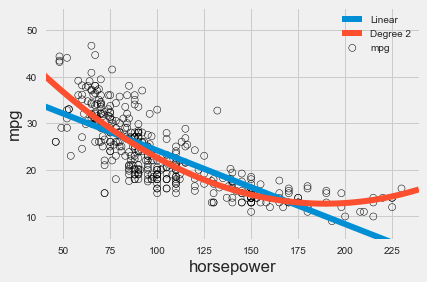

In [54]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.style.use('fivethirtyeight')
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
# sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

# 3.6 Lab: Linear Regression

####  House Data

In [55]:
name = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
Boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep= '\s+', names=name)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [56]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [57]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#### 3.6.2 simple regression with medv as response and lstat as predictor

In [59]:
lm_fit = smf.ols(formula='medv ~ lstat', data=Boston).fit()

In [60]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           5.08e-88
Time:                        10:01:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
lm_fit.conf_int(alpha=0.05)      # default alpha=0.05 : 95% confidence interval

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


####  OLS Prediction with confidence interval 

In [62]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_new = pd.DataFrame({'lstat':[5,10,15]})
lm_fit.predict(X_new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

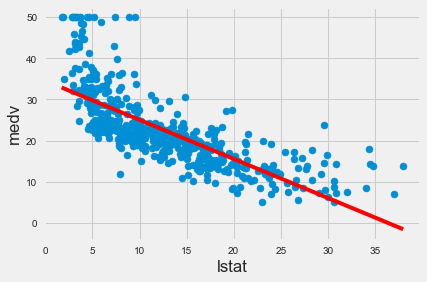

In [63]:
plt.scatter(Boston.lstat, Boston.medv )

X = pd.DataFrame({'lstat':[Boston.lstat.min(), Boston.lstat.max()]})
Y_pred = lm_fit.predict(X)
plt.plot(X, Y_pred, c='red')
plt.xlabel("lstat")
plt.ylabel("medv")

# 3.6.3 Multiple Linear Regression

In [64]:
lm_fit = smf.ols('medv ~ lstat+age', data=Boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           2.98e-88
Time:                        10:01:06   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R's "formula = medv ~." Similarly, there is no simple expression in python that makes all other columns except medv a predictor. Just do the following:

In [65]:
columns_selected = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv ~ " + columns_selected
my_formula

'medv ~ age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

 Simple operation, so you do not need to make it a function ... Note, like 'R'

In [66]:
lm_fit = smf.ols(formula = my_formula, data=Boston).fit()

In [67]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          6.72e-135
Time:                        10:01:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
lm_fit.resid.describe()       # Residuals statistics

count    5.060000e+02
mean     4.079898e-13
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64

In [69]:
columns_selected = "+".join(Boston.columns.difference(["medv", "age"]))
my_formula = "medv ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=Boston).fit()
lm_fit1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,36.4369,5.080,7.172,0.000,26.456,46.418
black,0.0093,0.003,3.481,0.001,0.004,0.015
chas,2.6890,0.860,3.128,0.002,1.000,4.378
crim,-0.1080,0.033,-3.290,0.001,-0.173,-0.043
dis,-1.4786,0.191,-7.757,0.000,-1.853,-1.104
indus,0.0206,0.061,0.335,0.738,-0.100,0.141
lstat,-0.5239,0.048,-10.999,0.000,-0.617,-0.430
nox,-17.7135,3.679,-4.814,0.000,-24.943,-10.484
ptratio,-0.9522,0.130,-7.308,0.000,-1.208,-0.696
rad,0.3058,0.066,4.627,0.000,0.176,0.436


In [70]:
lm_fit1.resid.describe()

count    5.060000e+02
mean    -1.188158e-13
std      4.683835e+00
min     -1.560538e+01
25%     -2.731276e+00
50%     -5.187814e-01
75%      1.760098e+00
max      2.622427e+01
dtype: float64

## 3.6.4 Interaction Terms

In [71]:
lm_fit = smf.ols('medv ~ lstat*age', data=Boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           4.86e-88
Time:                        10:01:22   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Create a random test set to predict response

In [73]:
# Interaction term, but these are derived from the 'age' and 'lstat' variables, so you only need these two variables.
test = pd.DataFrame({'age':[65.4, 79, 23], 'lstat':[4.8, 10, 5]})
test

,age,lstat
0,65.4,4.8
1,79.0,10.0
2,23.0,5.0


In [74]:
lm_fit.predict(exog=test)

0    30.663867
1    25.393622
2    29.589306
dtype: float64

In [75]:
### Calculate the residual. Error does not occur when putting 'rm', 
### which is not used when fitting a model, as a prediction variable.

y_predict = lm_fit.predict(Boston.loc[:,['age', 'lstat',  'rm']])   # training set
(Boston.medv - y_predict)[0:5]     

0   -6.458215
1   -4.704760
2    3.242407
3    0.877696
4    6.369921
dtype: float64

In [76]:
lm_fit.resid[:5]            # As the result above

0   -6.458215
1   -4.704760
2    3.242407
3    0.877696
4    6.369921
dtype: float64

##  Scikit Learn Implementation of Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression  
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [81]:
X = advertising.loc[ :, ['TV', 'Radio', 'Newspaper'] ]   
y = advertising.Sales
print(X.head(), '\n')

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4 



In [82]:
X.shape , X.values.shape         

((200, 3), (200, 3))

In [83]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [84]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
print(model.coef_)            # Feature matrix 'X' in order of feature, TV ',' Radio ',' Newspaper '
list(zip(X.columns, model.coef_ ))

[ 0.04576465  0.18853002 -0.00103749]


[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

In [86]:
model.intercept_

2.9388893694594085

### R-squared 

In [87]:
model.score(X, y, sample_weight=None)        

0.89721063817895208

In [88]:
## Predict response
y_pred = model.predict(X)
pd.DataFrame({'y_True': y, "y_pred": y_pred}).head(10)     

,y_True,y_pred
1,22.1,20.523974
2,10.4,12.337855
3,9.3,12.307671
4,18.5,17.597830
5,12.9,13.188672
6,7.2,12.478348
7,11.8,11.729760
8,13.2,12.122953
9,4.8,3.727341
10,10.6,12.550849
